Logistic Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


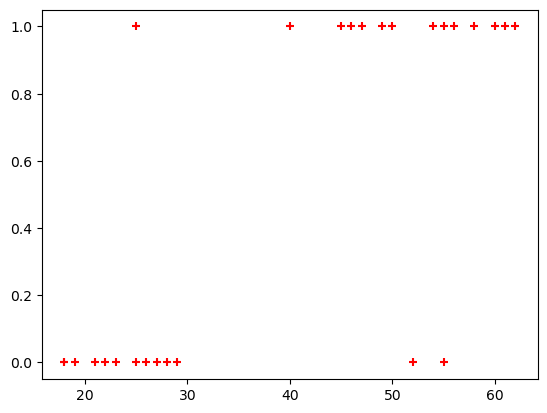

In [4]:
plt.scatter(df.age, df.bought_insurance, marker="+", color="red")

In [12]:
from sklearn.model_selection import train_test_split

X = df[['age']]
y = df['bought_insurance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(X_train, y_train)

LogisticRegression()

In [16]:
X_test

,age
10,18
0,22
15,55


In [14]:
m.predict(X_test)

array([0, 0, 1])

In [13]:
m.score(X_test, y_test)

1.0

In [15]:
m.predict_proba(X_test)  # shows in 2 classes - 1st class will not buy the insurance, 2nd will buy

array([[0.92960603, 0.07039397],
       [0.88922293, 0.11077707],
       [0.11668242, 0.88331758]])